In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
df = pd.read_csv('C:\study\workspace_python\pdsample\datasets\mydata\PRSA_data_2010.1.1-2014.12.31.csv')
print('Shape of data frame',df.shape)
df.head()

Shape of data frame (43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [11]:
df['datetime'] = df[['year','month','day','hour']].apply(lambda row : datetime.datetime(year = row['year'],
                                                                      month = row['month'],
                                                                      day = row['day'],
                                                                      hour = row['hour']), axis = 1)
df.sort_values('datetime', ascending = 'True', inplace = True)
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


C:\ca_da\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


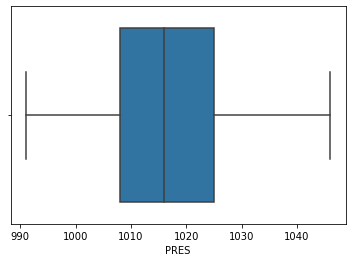

In [13]:
g = sns.boxplot(df['PRES'])

C:\ca_da\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='datetime', ylabel='PRES'>

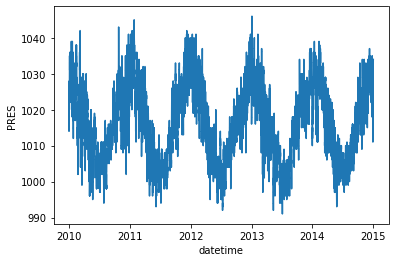

In [15]:
sns.lineplot('datetime', 'PRES', data = df)

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

df['scaled_PRES'] = scaler.fit_transform(np.array(df['PRES']).reshape(-1,1))

In [25]:
split_date = datetime.datetime(year = 2014, month = 1, day = 1, hour = 0)
df_train = df.loc[df['datetime'] < split_date]
df_test = df.loc[df['datetime']> split_date]
print('train shape', df_train.shape)
print('test shape', df_test.shape)

train shape (35064, 15)
test shape (8759, 15)


In [29]:
df_test.reset_index(drop=True, inplace = True)

<AxesSubplot:xlabel='datetime', ylabel='scaled_PRES'>

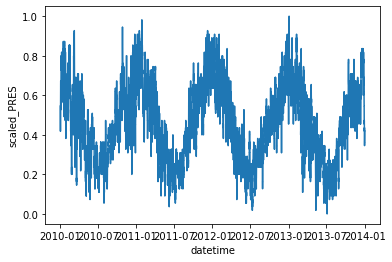

In [32]:
sns.lineplot(x = 'datetime', y = 'scaled_PRES', data = df_train)

<AxesSubplot:xlabel='datetime', ylabel='scaled_PRES'>

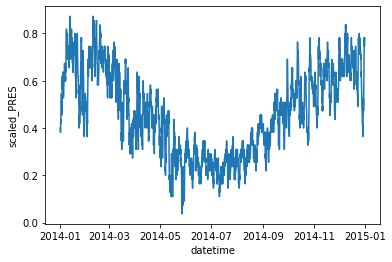

In [33]:
sns.lineplot(x = 'datetime', y = 'scaled_PRES', data = df_test)

In [35]:
df_train['scaled_PRES'].shape[0]

35064

In [53]:
def makeXy(ts, nb_timesteps):
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [54]:
X_train, y_train = makeXy(df_train['scaled_PRES'], 7)
X_test, y_test = makeXy(df_test['scaled_PRES'],7)

In [64]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import AveragePooling1D
from keras.models import Sequential

In [56]:
X_train

array([[0.54545455, 0.52727273, 0.50909091, ..., 0.49090909, 0.47272727,
        0.47272727],
       [0.52727273, 0.50909091, 0.50909091, ..., 0.47272727, 0.47272727,
        0.47272727],
       [0.50909091, 0.50909091, 0.49090909, ..., 0.47272727, 0.47272727,
        0.47272727],
       ...,
       [0.36363636, 0.38181818, 0.38181818, ..., 0.4       , 0.4       ,
        0.41818182],
       [0.38181818, 0.38181818, 0.38181818, ..., 0.4       , 0.41818182,
        0.41818182],
       [0.38181818, 0.38181818, 0.4       , ..., 0.41818182, 0.41818182,
        0.41818182]])

In [58]:
X_train, X_test = (X_train.reshape(X_train.shape[0],X_train.shape[1],1),
                   X_test.reshape(X_test.shape[0],X_test.shape[1],1))


In [67]:
X_train.shape

(35057, 7, 1)

In [71]:
model = Sequential()
model.add(Conv1D(64,3, strides = 1, use_bias = True, input_shape = (7,1),
                padding = 'same'))
model.add(AveragePooling1D(pool_size = 3, strides=1))
model.add(Flatten())
model.add(Dropout(0,2))
model.add(Dense(1, activation='linear'))

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 7, 64)             256       
_________________________________________________________________
average_pooling1d_1 (Average (None, 5, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 321       
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
history = model.fit(X_train, y_train, batch_size = 16, epochs = 5, shuffle = True)

Epoch 1/5


TypeError: in user code:

    C:\ca_da\anaconda\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\ca_da\anaconda\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ca_da\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ca_da\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ca_da\anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ca_da\anaconda\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\ca_da\anaconda\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\ca_da\anaconda\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\ca_da\anaconda\lib\site-packages\keras\engine\sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\ca_da\anaconda\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\ca_da\anaconda\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\ca_da\anaconda\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\ca_da\anaconda\lib\site-packages\keras\layers\core.py:212 call
        output = control_flow_util.smart_cond(training, dropped_inputs,
    C:\ca_da\anaconda\lib\site-packages\keras\utils\control_flow_util.py:105 smart_cond
        return tf.__internal__.smart_cond.smart_cond(
    C:\ca_da\anaconda\lib\site-packages\tensorflow\python\framework\smart_cond.py:56 smart_cond
        return true_fn()
    C:\ca_da\anaconda\lib\site-packages\keras\layers\core.py:208 dropped_inputs
        noise_shape=self._get_noise_shape(inputs),
    C:\ca_da\anaconda\lib\site-packages\keras\layers\core.py:197 _get_noise_shape
        for i, value in enumerate(self.noise_shape):

    TypeError: 'int' object is not iterable


Shape of the dataframe: (43824, 13)


C:\ca_da\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Shape of train: (35064, 15)
Shape of test: (8760, 15)
Shape of train arrays: (35057, 7) (35057,)
[0.54545455 0.52727273 0.50909091 0.50909091 0.49090909 0.47272727
 0.47272727]
0.47272727272727266
Shape of Test arrays: (8753, 7) (8753,)
[0.41818182 0.4        0.4        0.4        0.38181818 0.38181818
 0.38181818]
0.40000000000000213
Shape of arrays after reshaping: (35057, 7, 1) (8753, 7, 1)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 7, 64)             256       
_________________________________________________________________
average_pooling1d_2 (Average (None, 5, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 320)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 320)             

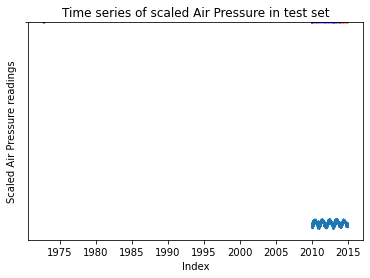

In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime


#Read the dataset into a pandas.DataFrame
df = pd.read_csv('C:\study\workspace_python\pdsample\datasets\mydata\PRSA_data_2010.1.1-2014.12.31.csv')
print('Shape of the dataframe:', df.shape)
df.head()

# Index creation
df['datetime'] = df[['year', 'month', 'day', 'hour']].\
    apply(lambda row: datetime.datetime(year=row['year'], \
    month=row['month'], day=row['day'],hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)
df.head()

#Let us draw a box plot to visualize the central tendency and dispersion of PRES
g = sns.boxplot(df['PRES'])
g.set_title('Box plot of Air Pressure')

# Time series visualization
g = sns.lineplot(x='datetime',y='PRES',data=df)
g.set_title('Time series of Air Pressure')
g.set_xlabel('Index')
g.set_ylabel('Air Pressure readings in hPa')


# Minmax scaling PRES variable
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_PRES'] = scaler.fit_transform(np.array(df['PRES']).reshape(-1, 1))
df.head()

"""
Let's start by splitting the dataset into train and test. 
The dataset's time period is from
Jan 1st, 2010 to Dec 31st, 2014. 
The first four years - 2010 to 2013 is used as train and
2014 is kept for test.
"""
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_test = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_test.shape)


#First five rows of train
df_train.head()

#First five rows of test
df_test.head()

#Reset the indices of the validation set
df_test.reset_index(drop=True, inplace=True)
df_test.head()

"""
The train and test time series of standardized PRES are also plotted.
"""

g = sns.lineplot(x='datetime',y='scaled_PRES',data=df_train, color='b')
g.set_title('Time series of scaled Air Pressure in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings')

g = sns.lineplot(x='datetime',y='scaled_PRES',data=df_test, color='r')
g.set_title('Time series of scaled Air Pressure in test set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings')

# Make dataset to forecast using past 7 days

def makeXy(ts, nb_timesteps):
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

# Make training set
X_train, y_train = makeXy(df_train['scaled_PRES'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)
print(X_train[0])
print(y_train[0])

# Make test set
X_test, y_test = makeXy(df_test['scaled_PRES'], 7)
print('Shape of Test arrays:', X_test.shape, y_test.shape)
print(X_test[0])
print(y_test[0])

# Keras import
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import AveragePooling1D
from keras.models import Sequential

#X_train and X_val are reshaped to 3D arrays
X_train, X_test = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)),\
                 X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Shape of arrays after reshaping:', X_train.shape, X_test.shape)

model=Sequential()
model.add(Conv1D(64, 3, strides=1, use_bias=True, input_shape=(7,1),padding='same'))
model.add(AveragePooling1D(pool_size=3, strides=1))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

history=model.fit(X_train, y_train, batch_size=16, epochs=10,shuffle=True)


In [101]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35057, 7, 1)
(8753, 7, 1)
(35057,)
(8753,)


In [78]:
pred = model.predict(X_test)
pred_PRES = scaler.inverse_transform(pred)


array([[1011.1751 ],
       [1012.4312 ],
       [1012.90405],
       ...,
       [1032.9657 ],
       [1032.961  ],
       [1032.6193 ]], dtype=float32)

In [103]:
print(len(pred_PRES))
len(df_test['PRES'])

8753


8760

In [105]:
from sklearn.metrics import r2_score

r2 = r2_score(df_test['PRES'].loc[7:], pred_PRES)
r2

0.9898031899101144

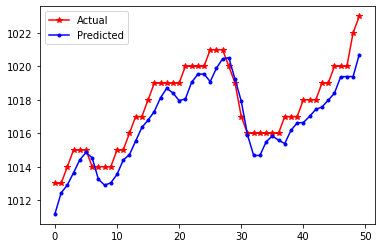

In [93]:
plt.plot(range(50), df_test['PRES'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)

In [88]:
df_test['P']

8753